## Observations and Insights

1) Ramicane and Capomulin are the drug regimens most used and the ones with the lowest average of tumor size treated
2) Capomulin seem pretty efective reducing the size of tumors at arounf 50% in some cases
3) Evaluating the mouses treated with Capomulin, we can observe that there is a relationship between the weight of the mouse and the Volume of the tumor. The bigger themouse the bigger tumor's volume. 

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:

Drug_List = merge_table['Drug Regimen'].unique()
Drug_list=Drug_List.tolist()


In [4]:

# Generate a summary statistics table of mean, median, variance,standard deviation and SEM of the tumor volume for each regimen

mean_list = []
median_list = []
var_list = []
sem_list = []
sd_list= []

for drug in Drug_List:
    
    Tumor_Volume = merge_table.loc[(merge_table["Drug Regimen"]==drug),:]
    Tumor_Volume = Tumor_Volume["Tumor Volume (mm3)"]   
    mean_numpy = np.mean(Tumor_Volume)
    median_numpy = np.median(Tumor_Volume)
    var_numpy = np.var(Tumor_Volume,ddof = 0)
    sd_numpy = np.std(Tumor_Volume,ddof = 0)
    sem_scipy = st.sem(Tumor_Volume, axis=None, ddof=0)
    
    mean_list.append(mean_numpy)
    median_list.append(median_numpy)
    var_list.append(var_numpy)
    sd_list.append(sd_numpy)
    sem_list.append(sem_scipy)
    
 
Summary_dict = {
    "Drug Regimen" : Drug_List,
    "Mean":mean_list ,
    "Median":median_list,
    "Variance":var_list,
    "Standard Deviation":sd_list,
    "SEM":sem_list
}

Summary_data = pd.DataFrame(Summary_dict)
Summary_data
  



,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Ramicane,40.216745,40.673236,23.383692,4.835669,0.320250
1,Capomulin,40.675741,41.557809,24.839296,4.983904,0.328629
2,Infubinol,52.884795,51.820584,42.886388,6.548770,0.490851
3,Placebo,54.033581,52.288934,60.830138,7.799368,0.579722
4,Ceftamin,52.591172,51.776157,39.069446,6.250556,0.468499
5,Stelasyn,54.233149,52.431737,59.122106,7.689090,0.571526
6,Zoniferol,53.236507,51.818479,48.266689,6.947423,0.514977
7,Ketapril,55.235638,53.698743,68.188930,8.257659,0.602252
8,Propriva,52.322552,50.854632,42.088020,6.487528,0.511289
9,Naftisol,54.331565,52.509285,65.817708,8.112811,0.594860


## Bar plots

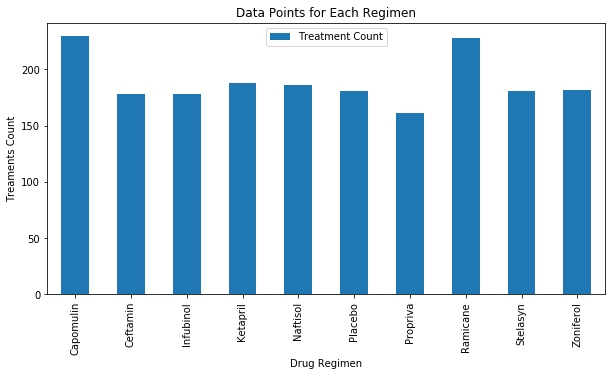

<Figure size 432x288 with 0 Axes>

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
Treatment_Group = merge_table.groupby(["Drug Regimen"])
Regimen_data = Treatment_Group["Mouse ID"].count()
Regimen_data_df = pd.DataFrame({"Treatment Count":Regimen_data})
Regimen_data_df.plot(kind="bar", figsize=(10,5))
plt.title("Data Points for Each Regimen")
plt.ylabel("Treaments Count")
plt.savefig("../Images/Data_per_Regimen1.png")
plt.show()
plt.tight_layout()


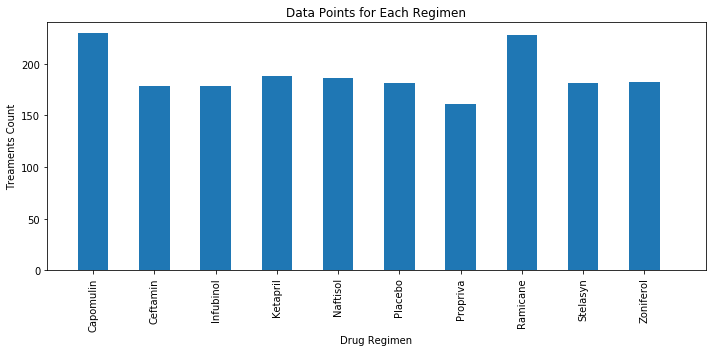

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
Treatment_Group = merge_table.groupby(["Drug Regimen"])
Regimen_data = Treatment_Group["Mouse ID"].count()

Regimen_name = Regimen_data.index.values.tolist()
Regimen_data = Regimen_data.tolist()

x_axis = np.arange(len(Regimen_name))
plt.figure(figsize=(10,5))
plt.bar(x_axis, Regimen_data, alpha=1, align="center", width = 0.5)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Regimen_name, rotation="vertical")


plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(Regimen_data)+10)
plt.title("Data Points for Each Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Treaments Count")
plt.tight_layout()
plt.savefig("../Images/Data_per_Regimen2.png")
plt.show()



## Pie plots

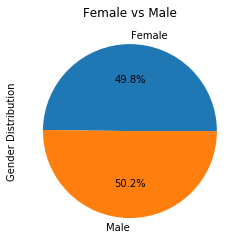

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Sex_Group = mouse_metadata.groupby(["Sex"])
Sex_data = Sex_Group["Mouse ID"].count()

label = Sex_data.index.values.tolist()
Sex_pie = Sex_data.plot(kind="pie", y=label,autopct="%1.1f%%", title=("Female vs Male"))
Sex_pie.set_ylabel("Gender Distribution")

plt.savefig("../Images/Female vs Male1.png")
plt.show()
plt.tight_layout()
#plt.axis("equal")


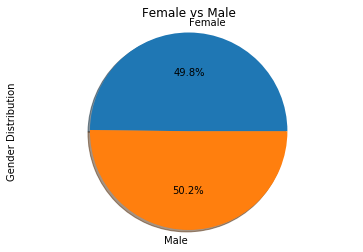

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Sex_Group = mouse_metadata.groupby(["Sex"])
Sex_data = Sex_Group["Mouse ID"].count()
labels = Sex_data.index.values.tolist()
Sex_data_list = Sex_data.tolist()


sizes = Sex_data_list

explode = (0, 0)

plt.pie(sizes, explode=explode, labels=labels,autopct="%1.1f%%", shadow=True, startangle=0)
plt.axis("equal")
plt.title("Female vs Male")
plt.ylabel("Gender Distribution")
plt.savefig("../Images/Female vs Male2.png")

## Quartiles, outliers and boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Capomulin, Ramicane, Infubinol, and Ceftamin
   
treatment_filter = merge_table.loc[(merge_table["Drug Regimen"]== "Capomulin"),:]
time_sort = treatment_filter.sort_values("Timepoint")
group_mouse = time_sort.groupby(["Mouse ID"])
last_tumor = group_mouse["Timepoint","Tumor Volume (mm3)"].last()
tumor_volumedf = last_tumor["Tumor Volume (mm3)"]
tumor_volumedf = tumor_volumedf.sort_values()
tumor_volumes = tumor_volumedf.tolist()

quartiles = tumor_volumedf.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print("Capomulin")
print("---------------------------------------------------")
print(f"IQR is {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


treatment_filter2 = merge_table.loc[(merge_table["Drug Regimen"]== "Ramicane"),:]
time_sort2 = treatment_filter2.sort_values("Timepoint")
group_mouse2 = time_sort2.groupby(["Mouse ID"])
last_tumor2 = group_mouse2["Timepoint","Tumor Volume (mm3)"].last()
tumor_volumes2df = last_tumor2["Tumor Volume (mm3)"]
tumor_volumes2df = tumor_volumes2df.sort_values()
tumor_volumes2 = tumor_volumes2df.tolist()

quartiles = tumor_volumes2df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print()
print("Ramicane")
print("---------------------------------------------------")
print(f"IQR is {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



treatment_filter3 = merge_table.loc[(merge_table["Drug Regimen"]== "Infubinol"),:]
time_sort3 = treatment_filter3.sort_values("Timepoint")
group_mouse3 = time_sort3.groupby(["Mouse ID"])
last_tumor3 = group_mouse3["Timepoint","Tumor Volume (mm3)"].last()
tumor_volumes3df = last_tumor3["Tumor Volume (mm3)"]
tumor_volumes3df = tumor_volumes3df.sort_values()
tumor_volumes3 = tumor_volumes3df.tolist()

quartiles = tumor_volumes3df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print()
print("Infubinol")
print("---------------------------------------------------")
print(f"IQR is {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


treatment_filter4 = merge_table.loc[(merge_table["Drug Regimen"]== "Ceftamin"),:]
time_sort4 = treatment_filter4.sort_values("Timepoint")
group_mouse4 = time_sort4.groupby(["Mouse ID"])
last_tumor4 = group_mouse4["Timepoint","Tumor Volume (mm3)"].last()
tumor_volumes4df = last_tumor4["Tumor Volume (mm3)"]
tumor_volumes4df = tumor_volumes4df.sort_values()
tumor_volumes4 = tumor_volumes4df.tolist()

quartiles = tumor_volumes4df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print()
print("Ceftamin")
print("---------------------------------------------------")
print(f"IQR is {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")






Capomulin
---------------------------------------------------
IQR is 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane
---------------------------------------------------
IQR is 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol
---------------------------------------------------
IQR is 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Ceftamin
---------------------------------------------------
IQR is 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


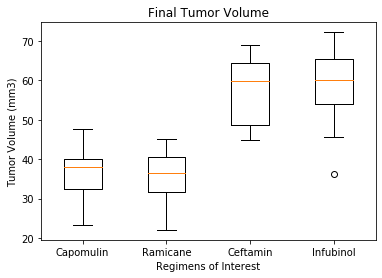

<Figure size 432x288 with 0 Axes>

In [54]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


#fig1, ax1 = plt.subplots()
#ax1.set_title('Final Tumor Volume for Capomulin')
#ax1.set_ylabel('Tumor Volume (mm3)')
#ax1.boxplot(tumor_volumes)
#plt.show()


#fig1, ax1 = plt.subplots()
#ax1.set_title('Final Tumor Volume for Ramicane')
#ax1.set_ylabel('Tumor Volume (mm3)')
#ax1.boxplot(tumor_volumes2)
#plt.show()


#fig1, ax1 = plt.subplots()
#ax1.set_title('Final Tumor Volume for Infubinol')
#ax1.set_ylabel('Tumor Volume (mm3)')
#ax1.boxplot(tumor_volumes3)
#plt.show()


#fig1, ax1 = plt.subplots()
#ax1.set_title('Final Tumor Volume for Ceftamin')
#ax1.set_ylabel('Tumor Volume (mm3)')
#ax1.boxplot(tumor_volumes4)

data = [tumor_volumes, tumor_volumes2, tumor_volumes4,tumor_volumes3]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Regimens of Interest')
ax1.boxplot(data)
ax1.set_xticklabels(['Capomulin','Ramicane','Ceftamin','Infubinol'])
plt.show()

plt.savefig("../Images/Final Tumor Volume.png")


## Line and scatter plots

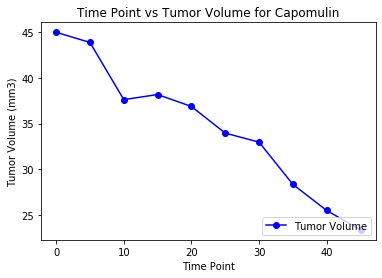

In [55]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Capomulin_filter = merge_table.loc[(merge_table["Drug Regimen"]=="Capomulin")|(merge_table["Mouse ID"]=="r157"),:]

Capomulin_filter = merge_table.loc[(merge_table["Drug Regimen"]=="Capomulin"),:]
Capomulin_filter = Capomulin_filter.loc[(merge_table["Mouse ID"]=="s185"),:]

Timepoint_list = Capomulin_filter["Timepoint"]
Tumor_Vol_list = Capomulin_filter["Tumor Volume (mm3)"]


# Each point on the sine chart is marked by a blue circle
Volumeplot, = plt.plot(Timepoint_list, Tumor_Vol_list, marker ='o', color='blue', label="Tumor Volume")
# Adds a legend and sets its location to the lower right

plt.title("Time Point vs Tumor Volume for Capomulin")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="lower right")
plt.savefig("../Images/lineplot.png")
plt.show()

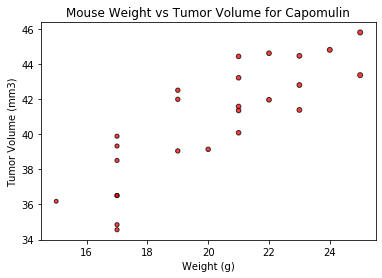

In [56]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_filter = merge_table.loc[(merge_table["Drug Regimen"]=="Capomulin"),:]
MouseID_group = Capomulin_filter.groupby(["Mouse ID"])

Average_Tumor = MouseID_group["Tumor Volume (mm3)"].mean()
Weight_list = MouseID_group["Weight (g)"].mean()


plt.scatter(Weight_list, Average_Tumor, marker="o", facecolors="red", edgecolors="black", s=Weight_list, alpha=0.75)

plt.title("Mouse Weight vs Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("../Images/scatter_plot.png")

The correlation between both factors is 0.84


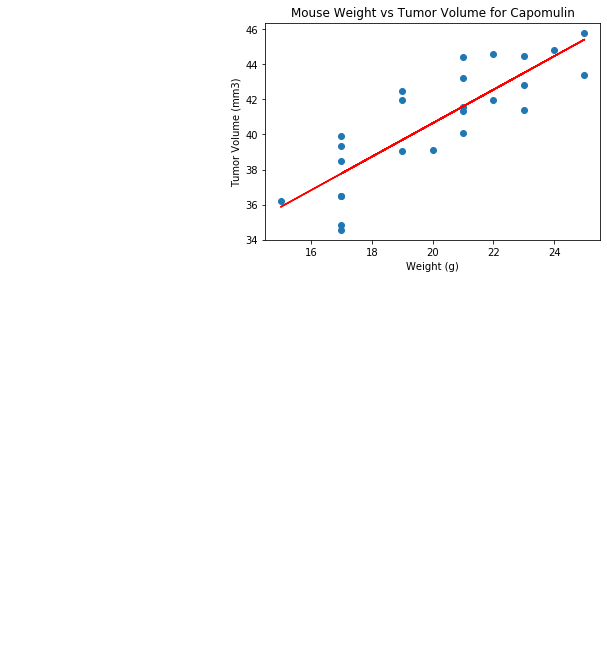

<Figure size 432x288 with 0 Axes>

In [58]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
#for the Capomulin regimen

correlation = st.pearsonr(Weight_list,Average_Tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")


x_values = Weight_list
y_values = Average_Tumor
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Mouse Weight vs Tumor Volume for Capomulin")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
plt.savefig("../Images/linear_regression.png")